# Usare una Convolutional Neural Network per classificare immagini

Benvenuto alla prima lezione di Deep Learning! Ora andremo ad utilizzare una convolutional neural network (CNN) per fare in modo che il computer possa riconoscere le immagini (la lezione è una rivisitazione in italiano del corso gratuito proposto da [fast.ai](http://course.fast.ai/). In questo caso la lezione utilizza Keras2 e Python 3, mentre gli originali sono relativi a Keras 1 e python 2

## Iniziamo da cani vs gatti

Svilupperemo un metodo per partecipare alla competizione su Kaggle di Cani contro Gatti [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats). Ci sono già 25,000 immagini che hanno un'etichetta (label) per il training, e 12,500 nel "test set" che dobbiamo cercare di riconoscere e classificare in modo corretto. Quando questa competizione è stata ideata diceva (fine 2013): *"**Stato dell'arte**: La letteratura scientifica corrente ci suggerisce che gli algoritmi di machine-learning possano raggiugnere una accuratezza del 80%"*. quindi se riusciremo a superare l'80%, saremo in grado di usare un metodo che supera lo stato dell'arte del 2013!

## Basic setup

Non c'è molto da fare, solo qualche piccola configurazione.

Quando si utilizza un Notebook Jupyter vogliamo che i plot vengano mostrati nel browser. Per fare questo digitiamo:

In [1]:
from __future__ import division, print_function

%matplotlib inline

### Abbiamo scaricato i dati

I dati sono già stati scaricati seguendo le istruzioni del [corso di DeepLearning su Noruen](http://noruen.com/corso/) 



In [9]:
path = "data/catVSdogs/"
#path = "data/catVSdogs/sample/"

Qualche libreria di cui abbiamo bisogno (attenzione se trovate errori, bisogna installare le librerie con conda)

In [10]:
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

Carichiamo un file con qualche funzione utile chiamato 'utils.py'

In [11]:
# controllate che ~/.keras/keras.json nella vostra cartella con "image_data_format": "channels_first"
from importlib import reload  # Python 3
import utils; reload(utils)
from utils import plots

# Usiamo un modello già pronto sulle nostre immagini

Il primo passo che facciamo è utilizzare un modello che è in grado di riconoscere già 1000 classi o categorie di immagini: VGG è il modello che ha vinto la competizione Imagenet nel 2014, quindi è perfetto come base di partenza perché molto vicino allo stato dell'arte.

Abbiamo creato una classe python, *Vgg16*, che consente di utilizzare questo modello in modo molto facile.

## Raggiungere un'acuratezza del 97% con 7 linee di codice

Ecco come faremo a ottenere un risultato strabiliante nel riconoscere cani e gatti con pochissime righe di codice. Nel seguito capiremo qualcosa di quello che sta dietro le scene, ma al momento vogliamo fare un uso "pratico" della nostra rete neurale.

In [15]:
# Si raccomanda più grande possibile, ma è influenzato dalla memoria disponibile (se si va out of memory abbassare)
#batch_size = 1
#batch_size = 4
batch_size = 256

In [16]:
# Importiamo e istanziamo
import keras
import vgg16; reload(vgg16)
from vgg16 import Vgg16

print(keras.__version__)

2.0.2


### Scarichiamo i file che ci servono:

Ora ci apprestiamo a scaricare i file dei pesi della rete e a classificare un po' di dati. Su questo punto spesso ci si blocca, perché richiede di scaricare circa 0,5 Gb di dati e di far girare il nostro algoritmo. Se il download si interrompe, il file non viene più scaricato e compromette i passi successivi. Se dovesse accadere, controllate il file salvato nella cache che nel mio caso è:
"~/.keras/models"

Una volta scaricato il codice, per essere eseguito, sul mio portatile, impiega 71 secondi. E' il momento giusto di lanciare il codice seguente e fare un pausa :)

In [17]:
vgg = Vgg16()
# Prendiamo alcune immagini
# NB: attenzione le immagini devono essere messe nelle cartelle di appartenenza (cani in dogs, gatti in cats)
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, batch_size, nb_epoch=1)



Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
 6/90 [=>............................] - ETA: 4760s - loss: 0.7124 - acc: 0.7721

KeyboardInterrupt: 

ATTENZIONE: se **genera errore**, controllate di aver copiato il file  ~/.keras/keras.json uguale tra le diverse macchine!

Il codice sopra funziona per **qualsiasi sia il numero di classi**: quindi in questo momento sappiamo costruire un classificatore che, se viene "allenato" sui nostri dati, sarà in grado di classificare immagini nuove.



## Usiamo Vgg16 per riconoscere le immagini

Iniziamo a usare *Vgg16* per riconoscere la categoria di ciascuna immagine, secondo la classificazione in Imagenet e vediamo come si comporta


In [23]:
vgg = Vgg16()

Prendiamo qualche immagine dalla nostra cartella di training:


In [24]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 18 images belonging to 2 classes.


(BTW, when Keras refers to 'classes', it doesn't mean python classes - but rather it refers to the categories of the labels, such as 'pug', or 'tabby'.)

*Batches* è un iteratore di Python. Ogni iterazione ci restituisce l'immagine e la sua etichetta.

In [26]:
imgs,labels = next(batches)
print (labels)

[[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]


Come si può notare ogni immagine ha una etichetta che è un array con 0 e 1. Ogni immagine può avere un solo 1 (in questo caso se in prima posizione è un gatto, in seconda un cane) e il resto zeri: in questo modo possiamo classificare quante diverse classi vogliamo e questo tipo di etichetta è chiamata *one hot encoding*. 

Se avessimo 3 categorie? Allora avremmo 3 elementi per etichetta, con un solo valore 1 per ogni immagine a seconda che sia cane, gatto o ... pesce?



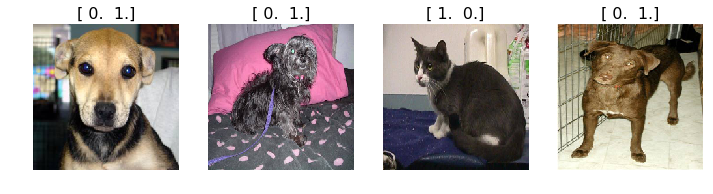

In [27]:
plots(imgs, titles=labels)

Per ora non abbiamo usato nessuna predizione: le immagini sono già classificate nella cartella train, perché sono inserite nell sotto cartelle corrette (Dogs e cats).

Ora vediamo invece come si comporta la rete neurale nella previsione:

In [28]:
vgg.predict(imgs, True)

(array([ 0.2426,  0.2899,  0.1824,  0.7999], dtype=float32),
 array([457, 199,  23, 209]),
 ['bow_tie', 'Scotch_terrier', 'vulture', 'Chesapeake_Bay_retriever'])

Le categorie sono in base a quelle di Imagenet. Di seguito vediamo le prime 4:

In [30]:
vgg.classes[:4]

['tench', 'goldfish', 'great_white_shark', 'tiger_shark']

## Usiamo Vgg16 e le nostre classi per mettere a punto un modello che distinuga cani e gatti

Useremo un processo chiamato "finetuning": è identico a un tipico approccio di machine learning, ma invece di partire da zero, mantiene i pesi (ovvero l'esperienza) di una rete e ne cambia solo i livelli finali.

Come intuizione possiamo pensare che la parte inizale della rete (quella esposta alle immagini) sia molto simile tra riconoscere immagini tra 1000 categorie e riconoscere cani e gatti. Mentre le parti finali sono quelle che andremo ad aggiornare facendo il training sulle nostre categorie e immagini.


In [31]:
#batch_size = 1
#batch_size = 4
batch_size = 64

In [32]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 18 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


Chiamando il metodo *finetune()* modifica il modello in modo da essere trainato sulle nostre classi - in questo caso "cane" o "gatto"

In [33]:
vgg.finetune(batches)

Infine noi modifichiamo i parametri del modello attraverso la fuznione *fit()* sui nostri dati, riportando l'accuratezza ottenuta sul set chiamato "validation" per ogni "epoca" o epoch (Un *epoch* è un passaggio completo sui dati di training).

In [34]:
vgg.fit(batches, val_batches, batch_size, nb_epoch=3)

Epoch 1/3
1/1 [==============================] - 62s - loss: 1.4416 - acc: 0.4444 - val_loss: 0.7808 - val_acc: 0.6000
Epoch 2/3
1/1 [==============================] - 59s - loss: 0.8305 - acc: 0.6667 - val_loss: 0.7853 - val_acc: 0.7000
Epoch 3/3
1/1 [==============================] - 57s - loss: 1.1584 - acc: 0.6667 - val_loss: 0.8595 - val_acc: 0.8000


Ora abbiamo visto tutti i passi necessari per usare il modello VGG16 su qualsiasi tipo di task previsto: riconoscere gli sport, i cibi, ...

# Creiamo un modello VGG da zero in Keras

Da qui in poi il tutorial è opzionale. Abbiamo raggiunto lo scopo al passo precedente. Ora vediamo come creare un modello.

## Setup

Importiamo un po' di librerie che ci serviranno:

In [35]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

Importiamo il file che consente il link tra gli id per le categorie usati nella VGG e la descrizione per poter usare le etichette in modo comprensibile.

In [36]:
FILES_PATH = 'http://www.platform.ai/models/'; CLASS_FILE='imagenet_class_index.json'
# Keras' get_file() è una funzione comoda che scarica i file e li mette nella cache (attenzione se vengono aggiornati)
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
# Convert dictionary with string indexes into an array
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

Vediamo qualche esempio di categoria:

In [37]:
classes[:5]

['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']

## Creazione del modello

Creare un modello significa:
* creare l'artchitettura del modello
* caricare i pesi nel modello (se già frutto di training bene, altrimenti casuali)

Il modello VGG è semplicissimo perché fatto solo da blocchi di convoluzione e un blocco "fully connected".

Possiamo anche definire delle funzioni che facilitano la creazione della rete

In [39]:
def ConvBlock(layers, model, filters):
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))
        model.add(Conv2D(filters, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

In [40]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

## Normalizzazione

Di solito le immagini e i dati sono normalizzati prima di essere trattati. 

Nel caso del modello VGG, i creatori hanno sottratto la media di ciascun canale dell'immagine, in mod da avere una media pari a zero. Anche l'ordine dei canali è diverso dal "solito", ovvero B,G,R.

Creiamo allora una funzione per pre-processare le immagini:

In [41]:
# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # reverse axis bgr->rgb

Ora defininiamo l'architettura del modello:

In [42]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224))) #applica il pre-processo alle immagini

    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model

Capiremo meglio il fiunzionamento dei diversi livelli. A grandi linee basta ricordare che:

- Convolution layers sono ideali per trovare dei pattern all'interno di una immagine (spigoli, archi, texture, ...)
- Dense (fully connected) sono adatti a combinare più pattern all'interno di una immagine (quadrati, volti, ...)

Definita l'architettura possiamo creare il modello, come qualsiasi oggetto python:

In [43]:
model = VGG_16()

Ora dobbiamo decidere i pesi: per fortuna non serve partire da zero. Possiamo usare l'esperienza accumulata in precedenza, caricando il file dei pesi di questa specifica architettura

In [44]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)

## Usare le previsioni della rete imagenet

Il modello con i pesi trainati sulle categorie imagenet è pronto. Proviamo a usarlo sulle nostre immagini:

In [45]:
batch_size = 4

Keras ci consente di creare *batches* di dati a partire dalle nostre cartelle che contenfono immagini.

Tutto quello che dobbiamo fare è:
- definire le dimensioni che le immagini dovranno avere per poter essere processate dal modello (in questo caso 224 x 224)
- che tipo di etichette creare
- se mescolare in modo randomizzato le immagini
- quante immagini includere in ogni batch

Definiamo questa funzione per applicare le etichette imagenet:

In [46]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

Da qui possiamo usare gli stessi passi fatti in precedenza

Found 18 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


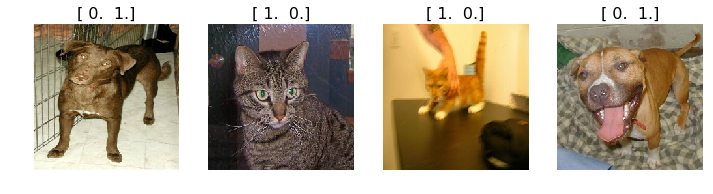

In [47]:
batches = get_batches('train', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

# This shows the 'ground truth'
plots(imgs, titles=labels)

Il modello VGG resitutiusce, per ogni immagini le 1000 probabilità che la stessa appartenga ad una specifica categoria.

Usando la funzione *np.argmax()* possiamo trovare l'indice con il valore più alto e quindi la categoria corrispondente.

In [48]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [49]:
pred_batch(imgs)

Shape: (4, 1000)
First 5 classes: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']
First 5 probabilities: [  3.0016e-07   1.4103e-08   8.5726e-07   2.4965e-07   1.8083e-05]

Predictions prob/class: 
  0.7999/Chesapeake_Bay_retriever
  0.5318/tabby
  0.1801/refrigerator
  0.1911/miniature_pinscher
